# ML modelling with MLOps
#### Split data by browser and platform_os, and version each split as a new version of the data in dvc.


In [1]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

In [2]:
# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

In [3]:
# To fill missing values
from sklearn.impute import SimpleImputer

In [4]:
# To Split our train data
from sklearn.model_selection import train_test_split

In [5]:
# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [7]:
#Adding scripts path
import sys, os
sys.path.insert(0,'../scripts/')
from data_preProcess import data_preProcess
from data_info import dataframeInfo 
from data_visualization import exploration

In [8]:
# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

In [9]:
# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [10]:
#Importing data version controls
import dvc.api

In [11]:
# importing dataset
df = pd.read_csv("../data/AdSmartABdata.csv")
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [12]:
# object creation
data_preProcess = data_preProcess(df)
data_info = dataframeInfo(df)

In [13]:
# getting users who only answers yes or no
response = df[df['yes'] == 1].append(df[df['no'] == 1])
response.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,0
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,0


In [15]:
# plotting distribution of the group
df1 = response[response['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = response[response['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
responsee = df1.append(df2).reset_index(drop=True)
responsee.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
1,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
2,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
3,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
4,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1


In [28]:
# removed non-responsive peoples and clean data produced
responsee.to_csv('../data2/clean_AdSmartABdata.csv')

In [ ]:
#Importing the collected Data
path = 'data2/clean_AdSmartABdata.csv'
repo = 'https://github.com/Abel-Blue/smartAd-abTest'
rev = 'version1'
data_url = dvc.api.get_url(path=path, repo=repo, rev=rev)
collected_data = pd.read_csv(data_url)

# One Hot Encoder

In [19]:
label_encoder = LabelEncoder()
# 
responsee['experiment'] = label_encoder.fit_transform(responsee['experiment'])
responsee['date'] = label_encoder.fit_transform(responsee['date'])
responsee['hour'] = label_encoder.fit_transform(responsee['hour'])
responsee['device_make'] = label_encoder.fit_transform(responsee['device_make'])
responsee['platform_os'] = label_encoder.fit_transform(responsee['platform_os'])
responsee['browser'] = label_encoder.fit_transform(responsee['browser'])
responsee['response'] = label_encoder.fit_transform(responsee['response'])

In [20]:
responsee.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,008aafdf-deef-4482-8fec-d98e3da054da,1,1,16,13,1,1,1
1,00b6fadb-10bd-49e3-a778-290da82f7a8d,0,5,4,43,1,4,1
2,018af862-486e-4da1-a85b-71872120e57c,0,0,15,13,1,1,1
3,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,1,6,13,65,1,4,1
4,02efdb70-8596-4f3f-b0b2-b91e194f61f7,1,2,6,13,1,1,1


In [34]:
browser_df = responsee[["experiment", "hour", "date", 'device_make', 'browser', 'response']]
platfrom_df = responsee[["experiment", "hour", "date", 'device_make', 'platform_os', 'response']]

# Splitting the data into browser

In [36]:
# Splitting the data according to features and the target feature
X1 = browser_df.drop('response', axis=1) #prediction features
y1 = browser_df['response'] #target feature
# 
# Splitting the data according to features and the target feature
X11 = platfrom_df.drop('response', axis=1) #prediction features
y11 = platfrom_df['response'] #target feature

In [37]:
# Splitting our dataset into training and testing dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30) #training set 70% and test set 30%

# Logistic Regression

### K-Fold Cross-validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

In [46]:
# Applying the K-fol Cross validation on logistic Regression model
regressor=LogisticRegression(random_state=None)
regressor.fit(X1_train,y1_train) 
scores=cross_val_score(estimator=regressor,X=X1_train,y=y1_train,cv=5,scoring='accuracy')
print(scores)
print('Mean LogisticRegression score :',scores.mean())

[0.50574713 0.52298851 0.52873563 0.56896552 0.56896552]
Mean LogisticRegression score : 0.539080459770115


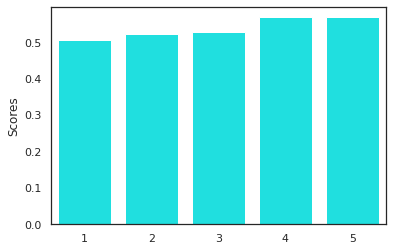

In [51]:
scores1 = pd.DataFrame(scores,columns=['Scores']) #storing the results into pandas dataframe
#plotting the accuracy score for the  different iteration
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['1','2','3','4','5'],y="Scores",data=scores1, color="cyan")
plt.show()
sns.set()

## Feature importance

In [52]:
#feature coefficients
regressor.fit(X1 / np.std(X1, 0), y1)
print(regressor.coef_)

[[ 0.05343081  0.1299312  -0.00484439  0.06868544 -0.05886028]]


Feature: 0, Score: 0.10595
Feature: 1, Score: 0.02261
Feature: 2, Score: -0.00185
Feature: 3, Score: 0.00247
Feature: 4, Score: -0.02966


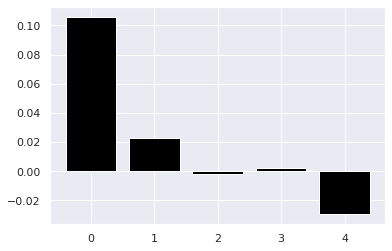

In [57]:
#plotting the feature importance
#The coefficients are both positive and negative.
# logistic regression for feature importance
from matplotlib import pyplot
# define the model
model = LogisticRegression()
# fit the model
model.fit(X1, y1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, color='black')
pyplot.show()